In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_loss_files(file_location,pattern):
    lhs_batch_work_dir=file_location
    filenames=os.listdir(lhs_batch_work_dir)
    lhs_lpi_batch=pd.DataFrame()
    for i in filenames:
        if len(re.findall(pattern,i))!=0:
            data=pd.read_csv(lhs_batch_work_dir+i,index_col=0)
            lhs_lpi_batch=pd.concat([lhs_lpi_batch,data],axis=1)
    return lhs_lpi_batch

def format_data(experiment):
    #seeks runs where the training process failed
    # and removes NA values
    n_experiment=np.shape(experiment)[1]
    experiment.columns=np.arange(n_experiment)
    failed=np.where(experiment==-1)[1]
    failed=[str(i) for i in failed]

    exclude=np.setdiff1d(experiment.columns.to_list(),failed)
    experiment=experiment.filter(items=list(exclude),axis=1)

    experiment.fillna(0,inplace=True)
    n_experiment=np.shape(experiment)[1]
    # print(n_experiment)
    return n_experiment,experiment


In [2]:



lhs_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_loss_per")
nrows_monod,ncols_monod=np.shape(lhs_lpi_monod)
failed_monod=np.where(lhs_lpi_monod==-1)[1]
n_lhs_lpi_monod,lhs_lpi_monod=format_data(lhs_lpi_monod)



lhs_lpi_batch=get_loss_files("../results/batch/lhs/",pattern="batch_run\d_loss_per")
nrows_batch,ncols_batch=np.shape(lhs_lpi_batch)

failed_batch=np.where(lhs_lpi_batch==-1)[1]
n_lhs_lpi_batch,lhs_lpi_batch=format_data(lhs_lpi_batch)


lhs_lpi_simple_sbml=get_loss_files("../results/simple_sbml/lhs/",pattern="simple_sbml_run\d_loss_per")
nrows_simplesbml,ncols_simplesbml=np.shape(lhs_lpi_simple_sbml)
failed_simple=np.where(lhs_lpi_simple_sbml==-1)[1]
n_lhs_lpi_simple_sbml,lhs_lpi_simple_sbml=format_data(lhs_lpi_simple_sbml)


lhs_lpi_BIOMD0000000458=get_loss_files("../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_loss_per")
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
n_lhs_lpi_BIOMD0000000458,lhs_lpi_BIOMD0000000458=format_data(lhs_lpi_BIOMD0000000458)

lhs_lpi_BIOMD0000000507=get_loss_files("../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_loss_per")
nrows_BIOMD0000000507,ncols_BIOMD0000000507=np.shape(lhs_lpi_BIOMD0000000507)
failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
n_lhs_lpi_BIOMD0000000507,lhs_lpi_BIOMD0000000507=format_data(lhs_lpi_BIOMD0000000507)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_32987/3877130713.py:1: SyntaxWarning: invalid escape sequence '\d'
  lhs_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_loss_per")
/tmp/ipykernel_32987/3877130713.py:8: SyntaxWarning: invalid escape sequence '\d'
  lhs_lpi_batch=get_loss_files("../results/batch/lhs/",pattern="batch_run\d_loss_per")
/tmp/ipykernel_32987/3877130713.py:15: SyntaxWarning: invalid escape sequence '\d'
  lhs_lpi_simple_sbml=get_loss_files("../results/simple_sbm

/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


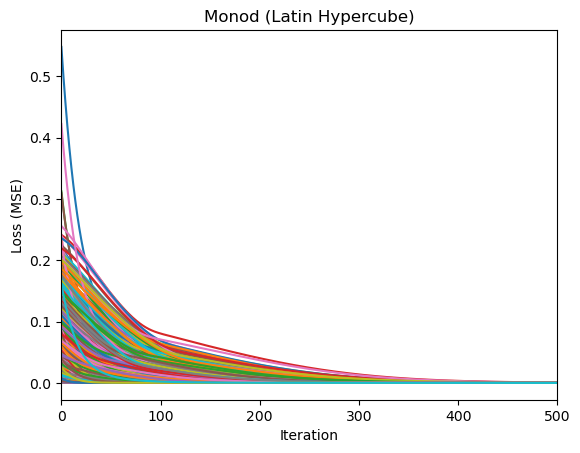

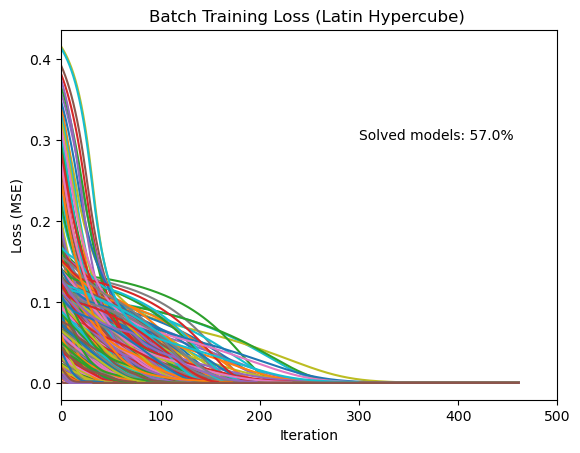

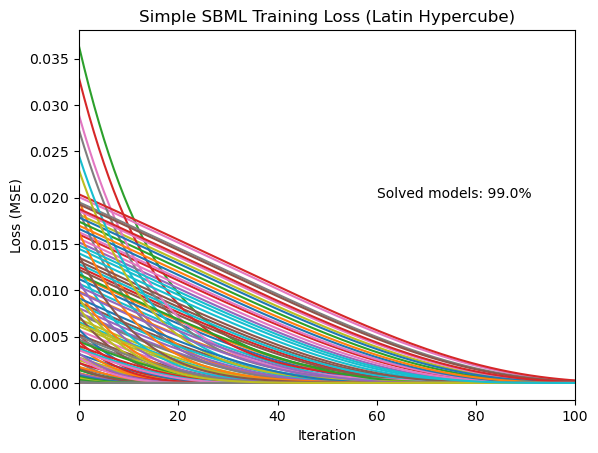

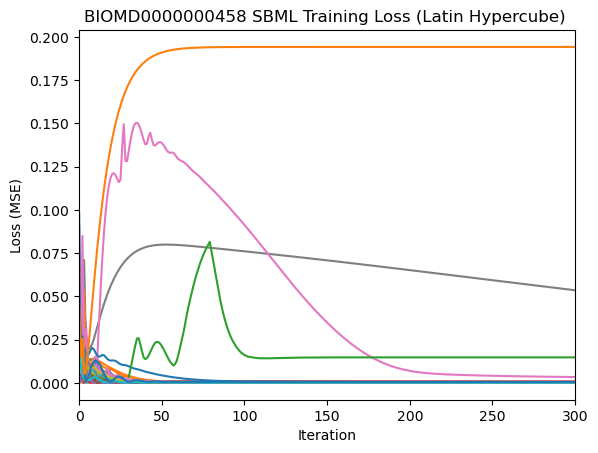

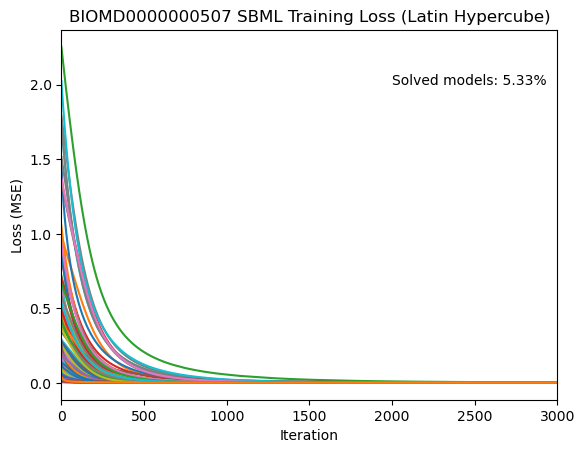

In [8]:
fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_monod)[1]):
    ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

succeeded=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_monod*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
plt.title("Monod (Latin Hypercube)")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.6))
plt.show()




fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_batch)[1]):
    ax.plot(lhs_lpi_batch.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_batch.iloc[nrows_batch-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_batch*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
# plt.title("Batc (Latin Hypercube) "+ str(n_lhs_lpi_monod)+" initializations")
plt.title("Batch Training Loss (Latin Hypercube) ")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.3))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_simple_sbml)[1]):
    ax.plot(lhs_lpi_simple_sbml.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_simple_sbml.iloc[nrows_simplesbml-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_simplesbml*100,2)
annotation="Solved models: "+str(succeeded)+ "%"

plt.title("Simple SBML Training Loss (Latin Hypercube)")
plt.xlabel("Iteration")
plt.xlim(0,100)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(60,0.02))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_BIOMD0000000458*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("BIOMD0000000458 SBML Training Loss (Latin Hypercube) ")
plt.xlabel("Iteration")
plt.xlim(0,300)
# plt.yscale("symlog")
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(200,0.3))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000507)[1]):
    ax.plot(lhs_lpi_BIOMD0000000507.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_BIOMD0000000507*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("BIOMD0000000507 SBML Training Loss (Latin Hypercube)")
plt.xlabel("Iteration")
plt.xlim(0,3000)
# plt.yscale("symlog")
# plt.ylim(0,1)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(2000,2))
plt.show()


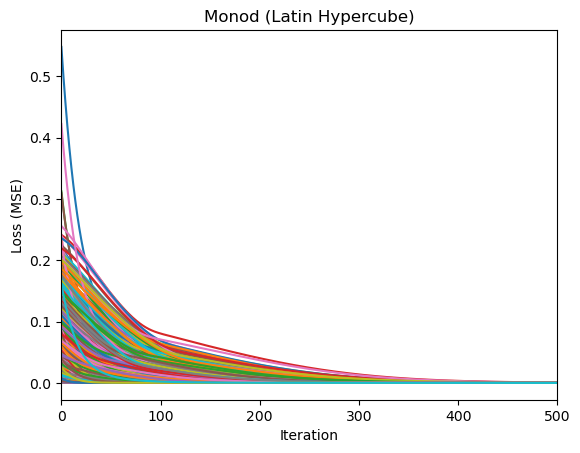

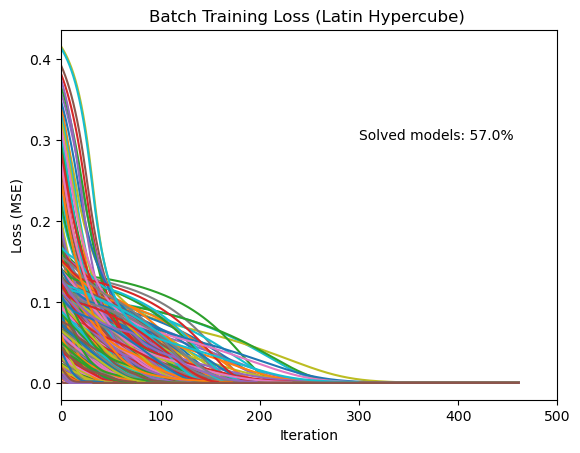

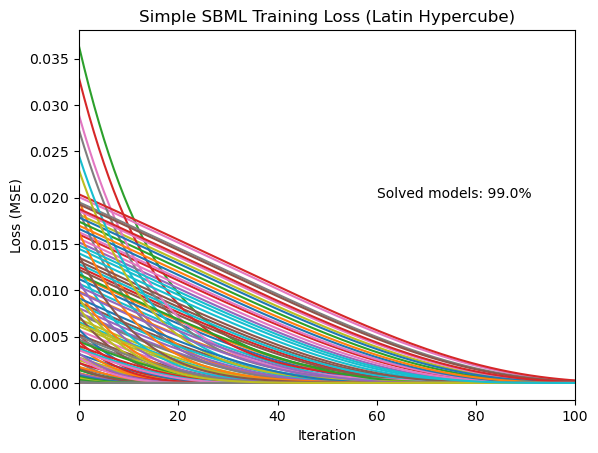

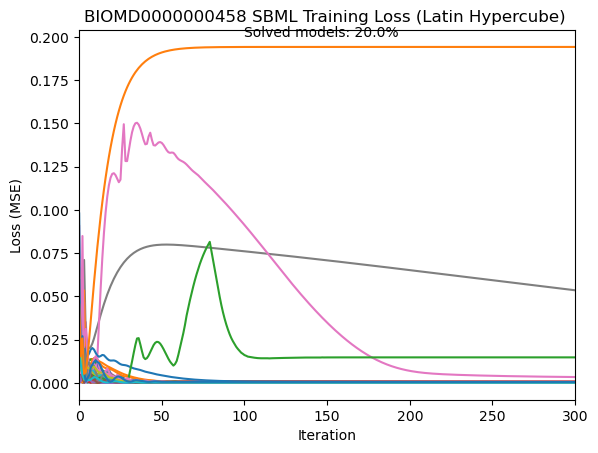

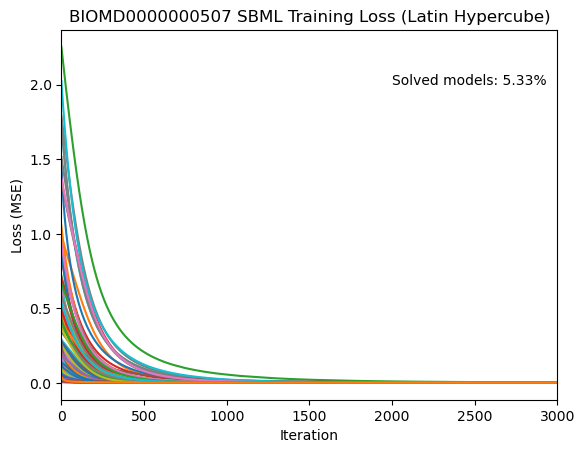

In [13]:
fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_monod)[1]):
    ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

succeeded=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_monod*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
plt.title("Monod (Latin Hypercube)")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.6))
plt.show()




fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_batch)[1]):
    ax.plot(lhs_lpi_batch.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_batch.iloc[nrows_batch-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_batch*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
# plt.title("Batc (Latin Hypercube) "+ str(n_lhs_lpi_monod)+" initializations")
plt.title("Batch Training Loss (Latin Hypercube) ")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.3))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_simple_sbml)[1]):
    ax.plot(lhs_lpi_simple_sbml.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_simple_sbml.iloc[nrows_simplesbml-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_simplesbml*100,2)
annotation="Solved models: "+str(succeeded)+ "%"

plt.title("Simple SBML Training Loss (Latin Hypercube)")
plt.xlabel("Iteration")
plt.xlim(0,100)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(60,0.02))
plt.show()



fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_BIOMD0000000458*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("BIOMD0000000458 SBML Training Loss (Latin Hypercube) ")
plt.xlabel("Iteration")
plt.xlim(0,300)
# plt.yscale("symlog")
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(100,0.2))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000507)[1]):
    ax.plot(lhs_lpi_BIOMD0000000507.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_BIOMD0000000507*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("BIOMD0000000507 SBML Training Loss (Latin Hypercube)")
plt.xlabel("Iteration")
plt.xlim(0,3000)
# plt.yscale("symlog")
# plt.ylim(0,1)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(2000,2))
plt.show()


In [15]:
params_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_optim")
# all_params=params_lpi_monod.iloc[0:9,:]
print(np.shape(params_lpi_monod))

pca_monod=PCA(n_components=2)
x_monod=pca_monod.fit_transform(params_lpi_monod.T)

params_lpi_batch=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_optim")
params_lpi_batch.drop(params_lpi_batch.columns[failed_batch],axis=1)
print(np.shape(params_lpi_batch))
# all_params=all_params.drop(all_params.columns[[28,29]],axis=1)
pca_batch=PCA(n_components=2)
x_batch=pca_batch.fit_transform(params_lpi_batch.T)



params_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_optim")

succeeded=list(np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0).keys())
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.iloc[:,succeeded]
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.dropna(axis=1)
print(np.shape(params_lpi_BIOMD0000000458))
pca_BIOMD0000000458=PCA(n_components=2)
x_BIOMD0000000458=pca_BIOMD0000000458.fit_transform(params_lpi_BIOMD0000000458.T)



params_lpi_BIOMD0000000507=get_loss_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_optim")
succeeded=list(np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0).keys())
params_lpi_BIOMD0000000507=params_lpi_BIOMD0000000507.iloc[:,succeeded]
params_lpi_BIOMD0000000507=params_lpi_BIOMD0000000507.dropna(axis=1)
print(np.shape(params_lpi_BIOMD0000000507))
pca_BIOMD0000000507=PCA(n_components=2)
x_BIOMD0000000507=pca_BIOMD0000000507.fit_transform(params_lpi_BIOMD0000000507.T)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_32987/3703162692.py:1: SyntaxWarning: invalid escape sequence '\d'
  params_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_optim")
/tmp/ipykernel_32987/3703162692.py:8: SyntaxWarning: invalid escape sequence '\d'
  params_lpi_batch=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_optim")
/tmp/ipykernel_32987/3703162692.py:17: SyntaxWarning: invalid escape sequence '\d'
  params_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_optim")
/tmp/ipykernel_3

(9, 600)
(4, 500)
(10, 40)
(7, 132)


/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [20]:
params_lpi_BIOMD0000000458

,1,0,0,0,1,3,2,1,0,2,...,0,1,4,4,0,1,0,0,3,4
fluxes.PDH.local_parameters.KAp3g,1.597057,2.014459,0.734297,1.345819,1.070340,0.848830,0.947264,2.089468,1.184466,0.381764,...,2.224366,1.850868,1.740468,1.303280,1.361751,0.710659,1.184864,1.208500,1.845773,0.970586
fluxes.PDH.local_parameters.KAphp,0.024592,0.000838,0.006260,0.005031,0.004058,0.002295,0.026589,0.005057,0.022821,0.025987,...,-0.017383,0.002596,0.002698,0.005065,0.033886,0.006867,0.022973,-0.005729,0.035007,-0.017770
fluxes.PDH.local_parameters.KiAser,-0.016522,0.001920,0.007296,0.005484,0.007943,0.002623,-0.010806,0.004493,0.008592,-0.066058,...,0.013152,0.003788,0.005244,0.005710,-0.012736,0.006544,0.006004,0.000623,-0.014756,0.015697
fluxes.PDH.local_parameters.kcatA,0.734607,0.401222,0.299471,0.575635,0.768610,0.883568,0.910057,0.335929,0.401024,0.405553,...,0.285495,0.417075,0.899916,0.822720,0.895256,0.673687,0.793584,0.928668,0.871153,0.637755
fluxes.PSA.local_parameters.KCphp,0.008134,0.004457,0.003576,0.004942,0.003621,0.010307,0.004597,0.005302,0.007989,0.005425,...,0.022244,0.003874,0.002926,0.005546,0.008267,0.002478,0.003729,0.004720,0.006692,0.002499
fluxes.PSA.local_parameters.KCpser,0.004052,-0.000162,-0.000107,-0.000017,-0.000113,-0.000275,0.002583,0.018316,0.006418,-0.000821,...,-0.000696,0.001401,0.000687,-0.000014,0.005109,-0.000053,0.002576,0.002848,0.003617,0.006525
fluxes.PSA.local_parameters.kcatC,2.054426,2.966813,2.620402,1.273473,2.512051,2.745082,1.996830,1.059448,1.848049,3.024136,...,2.944359,2.954890,2.776310,1.251754,1.978446,2.465657,1.871933,1.979018,2.021279,1.582926
fluxes.PSP.local_parameters.KBpser,0.002455,0.000275,0.003877,0.006489,0.003728,0.004966,0.003098,0.002249,0.001966,0.005932,...,0.007155,-0.000128,-0.000172,0.008007,0.005746,0.003821,0.001878,0.004087,0.003629,-0.000467
fluxes.PSP.local_parameters.KBser,0.166478,0.291781,0.213528,0.082779,0.280869,0.157055,0.157838,0.245231,0.260975,0.272670,...,0.103580,0.118707,0.114954,0.183202,0.297884,0.250456,0.253191,0.215533,0.200124,0.283360
fluxes.PSP.local_parameters.kcatB,1.786836,0.905022,2.570469,2.090847,1.694807,2.247477,2.147089,1.154358,1.253369,2.476123,...,2.835499,0.983620,0.806814,1.430208,2.161028,2.578593,1.244475,2.132055,2.046518,0.847478


0.9097196254905614
0.9064530187320081
0.7428272476293711
0.9996190477113799


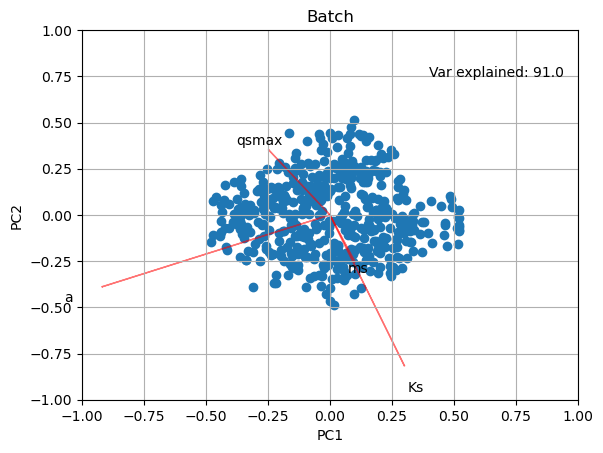

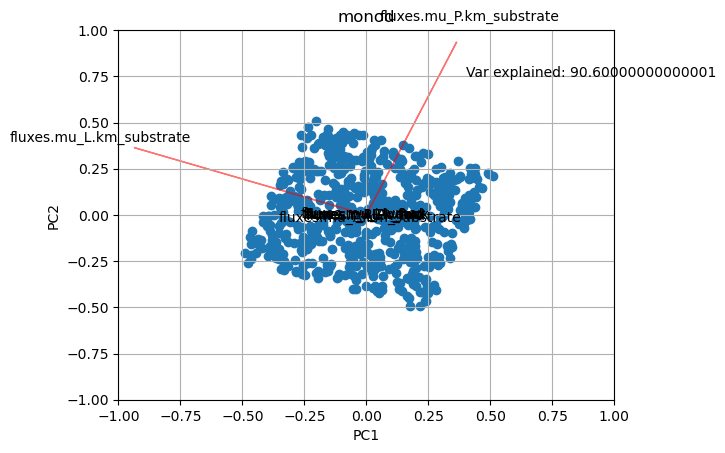

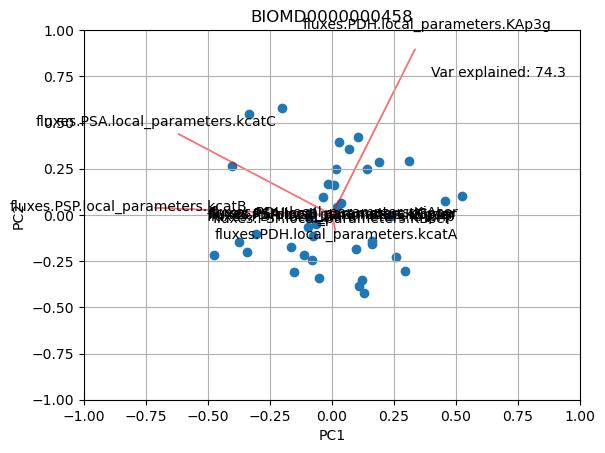

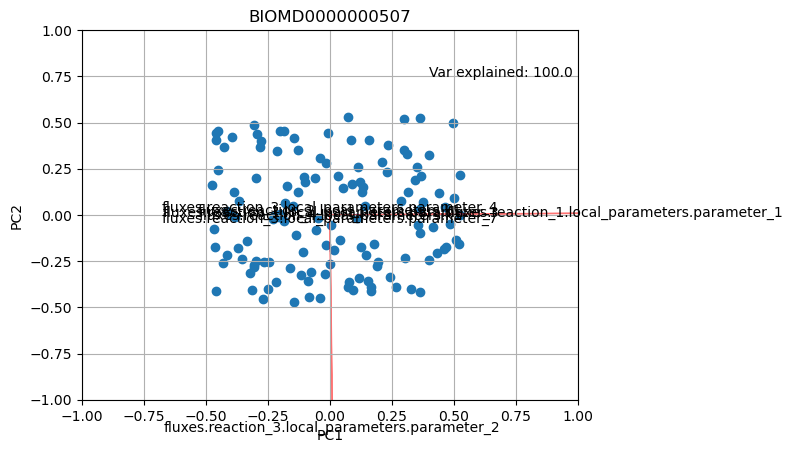

In [16]:
print(sum(pca_batch.explained_variance_ratio_))
print(sum(pca_monod.explained_variance_ratio_))
print(sum(pca_BIOMD0000000458.explained_variance_ratio_))
print(sum(pca_BIOMD0000000507.explained_variance_ratio_))

def myplot(score,coeff,labels,title,var_explained):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1]*1.15 , "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.title(title)
    plt.annotate("Var explained: "+str(np.round(var_explained,3)*100),xy=(0.4,0.75))
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


var_explained_batch=sum(pca_batch.explained_variance_ratio_)
var_explained_monod=sum(pca_monod.explained_variance_ratio_)
var_explained_BIOMD0000000458=sum(pca_BIOMD0000000458.explained_variance_ratio_)
var_explained_BIOMD0000000507=sum(pca_BIOMD0000000507.explained_variance_ratio_)

myplot(score=x_batch[:,0:2],
       coeff=np.transpose(pca_batch.components_[0:2, :]),
       labels=list(params_lpi_batch.index),
       title="Batch",
       var_explained=var_explained_batch)
plt.show()

myplot(score=x_monod[:,0:2],
       coeff=np.transpose(pca_monod.components_[0:2, :]),
       labels=list(params_lpi_monod.index),
       title="monod",
       var_explained=var_explained_monod)
plt.show()


myplot(score=x_BIOMD0000000458[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000458.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000458.index),
       title="BIOMD0000000458",
       var_explained=var_explained_BIOMD0000000458)
plt.show()


myplot(score=x_BIOMD0000000507[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000507.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000507.index),
       title="BIOMD0000000507",
       var_explained=var_explained_BIOMD0000000507)
plt.show()
# myplot(x_monod[:,0:2],np.transpose(pca_monod.components_[0:2, :]),labels=list(params_lpi_monod.index))



In [19]:
params_lpi_BIOMD0000000507

,3,0,3,4,2,0,1,2,3,0,...,2,1,0,1,4,1,2,1,3,4
fluxes.reaction_1.local_parameters.parameter_1,272.602260,191.412640,199.790160,84.258190,234.601910,180.749160,299.155700,256.230680,82.571980,270.225000,...,91.249860,176.325010,210.125690,140.206850,290.450160,243.641170,228.845110,101.608820,126.199910,223.149780
fluxes.reaction_1.local_parameters.parameter_3,1.351859,3.943779,2.067943,4.014323,2.979745,2.884390,3.145535,6.147674,2.019837,1.872070,...,2.082280,5.036653,3.745621,2.245989,3.989003,4.085159,2.723447,2.153190,2.736914,1.368401
fluxes.reaction_2.local_parameters.k1,1.323678,1.072077,1.458226,1.372502,1.019697,1.363722,0.933407,1.268026,0.585765,2.713021,...,1.591686,0.996280,0.620826,1.030258,1.102872,1.122523,1.045064,0.936391,1.012570,1.191667
fluxes.reaction_3.local_parameters.parameter_2,22.073078,21.372316,23.313345,9.586875,26.852795,12.689852,25.042265,18.901255,23.123003,16.321020,...,10.540231,15.229883,10.764910,28.051235,25.718370,15.122833,29.953688,19.483171,10.122625,19.207283
fluxes.reaction_3.local_parameters.parameter_4,1.184178,1.866891,1.111069,0.735642,0.768241,0.590721,1.578830,1.007196,1.048611,1.052082,...,1.044669,0.967677,0.513913,0.168779,0.551632,1.516703,0.538433,0.207638,0.723690,1.834226
fluxes.reaction_3.local_parameters.parameter_7,-0.000468,-0.000306,0.385741,-0.000336,0.257723,-0.000005,-0.000191,0.321626,-0.000532,0.148575,...,-0.000543,0.169410,-0.000323,0.343766,0.105394,-0.000415,0.261074,0.040377,-0.000709,-0.000998
fluxes.reaction_4.local_parameters.k1,1.746546,1.813906,1.114827,0.666380,1.293026,0.794077,1.965410,0.904531,1.583249,0.911419,...,0.723103,0.810914,1.886188,0.973420,1.296766,1.765669,1.315375,0.812954,0.715542,1.983935
